<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_%EC%95%99%EC%83%81%EB%B8%94(Ensemble)_%EA%B8%B0%EB%B2%95_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

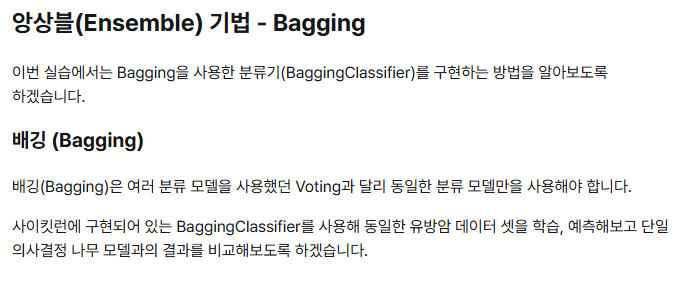

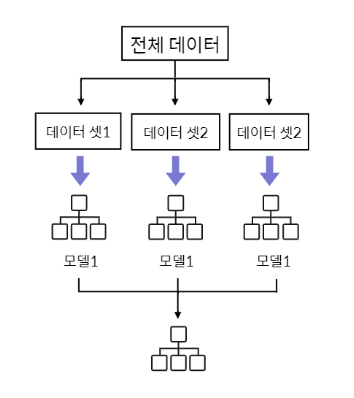

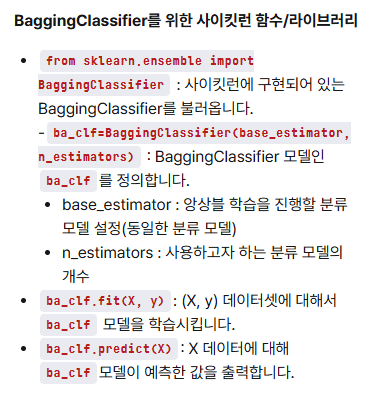

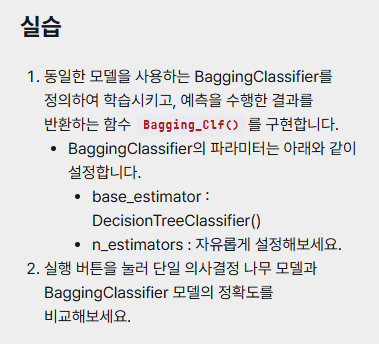

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 유방암 데이터를 불러오고,학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    X, y = load_breast_cancer(return_X_y = True)

    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 156)

    return train_X, test_X, train_y, test_y

"""
1. 동일한 모델을 사용하는 BaggingClassifier를 정의하여
   학습시키고, 예측을 수행한 결과를 반환하는 함수를 구현합니다.

   Step01. Bagging에 사용할 분류 모델을 설정하여
           BaggingClassifier를 정의합니다.

           모델은 의사결정 나무(DecisionTreeClassifier)를
           사용합니다.

           n_estimators는 자유롭게 설정합니다.

   Step02. BaggingClassifier를
           학습용 데이터에 맞춰 학습을 시킵니다.

   Step03. 테스트 데이터에 대한 예측을 수행합니다.
"""
def Bagging_Clf(train_X, test_X, train_y, test_y):

    ba_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100) # n_estimators 모델 사용 회수

    ba_clf.fit(train_X, train_y)

    pred = ba_clf.predict(test_X)

    return ba_clf, pred

# 데이터를 불러오고, 모델 학습 및 예측을 진행하기 위한 함수입니다.
def main():

    train_X, test_X, train_y, test_y = load_data()

    ba_clf, pred = Bagging_Clf(train_X, test_X, train_y, test_y)

    print('Bagging Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))

    # 단일 의사결정 나무를 학습했을 때 결과 예측하기
    single_dt = DecisionTreeClassifier()
    single_dt.fit(train_X,train_y)
    single_pred = single_dt.predict(test_X)
    print('Single Decision Tree Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, single_pred)))

if __name__ =="__main__":
    main()

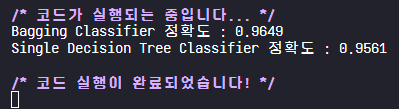